<a href="https://colab.research.google.com/github/Asli-BAADSHAH/INVEST-X/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#from datetime import datetime

In [238]:
df = pd.read_csv('Train.csv')
print(df.head())
df=df.head(300)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0  2006-07-31  Stock 1   625.898686  925.086518   1550.985204      675.789905   
1  2006-08-31  Stock 1   407.387467  903.249093   1310.636561     1023.110983   
2  2006-09-29  Stock 1   464.069891  602.668832   1066.738722      709.711673   
3  2006-10-31  Stock 1   855.854937  391.375369   1247.230306      649.979564   
4  2006-11-30  Stock 1   453.954969  956.490566   1410.445534     1115.594551   

   current_liabilities  total_revenue  net_income   dividend  \
0           555.931329     548.488451  251.282553  68.184030   
1          1295.186240     513.446432  207.576940  42.232672   
2           598.719338     503.519871  133.719700  28.835722   
3           733.594339     596.006397  -76.881818   0.000000   
4          1152.274711     965.939247 -309.204301   0.000000   

   shares_outstanding       price  
0             1040831  100.000000  
1             1046649  101.924169  
2             109415

In [239]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [240]:
df_for_training = df[cols].astype(float)

In [241]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [242]:
trainX = []
trainY = []

In [243]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [244]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (286, 14, 10).
trainY shape == (286, 1).


In [245]:
df_for_training_scaled

array([[ 0.33927535,  1.4439553 ,  1.32741326, ...,  1.75202465,
        -0.25368313, -1.13001325],
       [-0.53505957,  1.36273722,  0.65295245, ...,  0.83317901,
        -0.05190553, -0.93261857],
       [-0.30825464,  0.24481455, -0.03146803, ...,  0.35884045,
         1.59578297, -0.80520333],
       ...,
       [ 0.31803944,  1.12021993,  1.06825941, ..., -0.08954109,
        -0.61312331, -2.40026425],
       [ 0.75275108,  0.75270116,  1.09583189, ..., -0.28650059,
         1.60972498, -2.34718066],
       [ 1.01785332, -1.21915254, -0.20602788, ..., -0.52084799,
        -0.52804933, -2.26433503]])

In [246]:
trainY

array([[-0.27415295],
       [-0.4172296 ],
       [-0.35387503],
       [-0.42298223],
       [-0.45490064],
       [-0.38307664],
       [-0.27161913],
       [-0.33393997],
       [-0.47242882],
       [-0.63699319],
       [-0.58730559],
       [-0.53729528],
       [-0.46737562],
       [-0.43149354],
       [-0.3942545 ],
       [-0.35366943],
       [-0.18111648],
       [-0.14888244],
       [-0.01403419],
       [ 0.13603103],
       [ 0.3618567 ],
       [ 0.37585134],
       [ 0.328182  ],
       [ 0.23368626],
       [ 0.12337806],
       [ 0.15290226],
       [ 0.17534615],
       [ 0.25750438],
       [ 0.29304014],
       [ 0.26782156],
       [ 0.35172459],
       [ 0.29518009],
       [ 0.33853724],
       [ 0.48501681],
       [ 0.53745314],
       [ 0.54038024],
       [ 0.59345346],
       [ 0.69005345],
       [ 0.51770349],
       [ 0.49885217],
       [ 0.58014578],
       [ 0.6517627 ],
       [ 0.70288707],
       [ 0.78728772],
       [ 0.73221432],
       [ 0

In [247]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 14, 64)            19200     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [248]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
86/86 [==============================] - 6s 20ms/step - loss: 0.3218 - val_loss: 0.2185
Epoch 2/5
86/86 [==============================] - 1s 15ms/step - loss: 0.1007 - val_loss: 0.1338
Epoch 3/5
86/86 [==============================] - 2s 23ms/step - loss: 0.0861 - val_loss: 0.5234
Epoch 4/5
86/86 [==============================] - 2s 21ms/step - loss: 0.0973 - val_loss: 1.4811
Epoch 5/5
86/86 [==============================] - 1s 15ms/step - loss: 0.0739 - val_loss: 0.0934


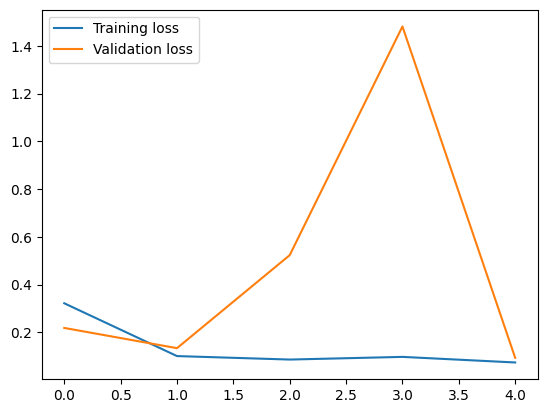

In [249]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [250]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [251]:
df2= df.head(300)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

285   2017-10-31
286   2017-11-30
287   2017-12-29
288   2018-01-31
289   2018-02-28
290   2018-03-30
291   2018-04-30
292   2018-05-31
293   2018-06-29
294   2018-07-31
295   2018-08-31
296   2018-09-28
297   2018-10-31
298   2018-11-30
299   2018-12-31
Name: Date, dtype: datetime64[ns]


In [252]:
n_past = 300
n_days_for_prediction=286 

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2006-07-31 00:00:00', freq='M'), Timestamp('2006-08-31 00:00:00', freq='M'), Timestamp('2006-09-30 00:00:00', freq='M'), Timestamp('2006-10-31 00:00:00', freq='M'), Timestamp('2006-11-30 00:00:00', freq='M'), Timestamp('2006-12-31 00:00:00', freq='M'), Timestamp('2007-01-31 00:00:00', freq='M'), Timestamp('2007-02-28 00:00:00', freq='M'), Timestamp('2007-03-31 00:00:00', freq='M'), Timestamp('2007-04-30 00:00:00', freq='M'), Timestamp('2007-05-31 00:00:00', freq='M'), Timestamp('2007-06-30 00:00:00', freq='M'), Timestamp('2007-07-31 00:00:00', freq='M'), Timestamp('2007-08-31 00:00:00', freq='M'), Timestamp('2007-09-30 00:00:00', freq='M'), Timestamp('2007-10-31 00:00:00', freq='M'), Timestamp('2007-11-30 00:00:00', freq='M'), Timestamp('2007-12-31 00:00:00', freq='M'), Timestamp('2008-01-31 00:00:00', freq='M'), Timestamp('2008-02-29 00:00:00', freq='M'), Timestamp('2008-03-31 00:00:00', freq='M'), Timestamp('2008-04-30 00:00:00', freq='M'), Timestamp('2008-05-31 00:00:00'

In [253]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

9/9 [==============================] - 0s 6ms/step


In [254]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [255]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [256]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-256-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
295,2018-08-31,88.802113
296,2018-09-28,88.018930
297,2018-10-31,87.617812
298,2018-11-30,88.135261


In [257]:
df_forecast

,Date,price
0,2006-07-31,107.644890
1,2006-08-31,107.179596
2,2006-09-30,107.371971
3,2006-10-31,106.964951
4,2006-11-30,106.762024
...,...,...
281,2029-12-31,82.742599
282,2030-01-31,83.122917
283,2030-02-28,83.090538
284,2030-03-31,82.817192


<Axes: xlabel='Date'>

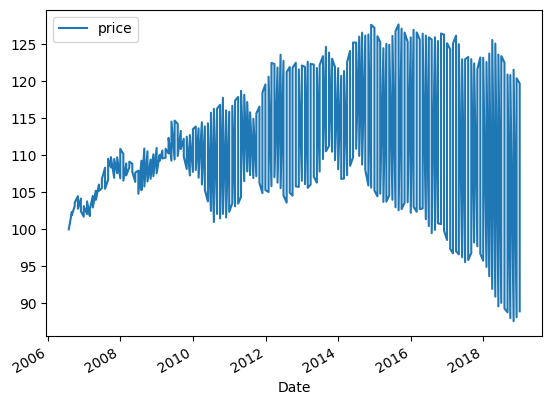

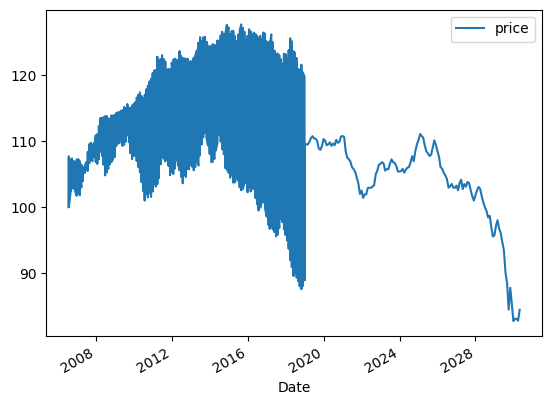

In [258]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [259]:
# For finding efficiency of our model

import math as mth
def rmse_calc(actual,predicted):
  rmse=mth.sqrt(((((actual-predicted)/actual)*100)**2).mean())
  return rmse

print('the efficiency of our model is=',100-rmse_calc(original['price'],df_forecast['price']) )

the efficiency of our model is= 96.34677419503632
